This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

I also wrote a [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests which you can check out. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('./kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

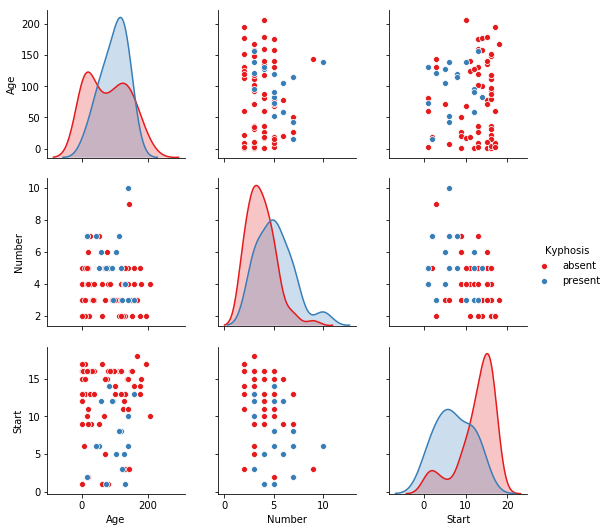

In [5]:
sns.pairplot(df, hue = 'Kyphosis', palette = 'Set1')

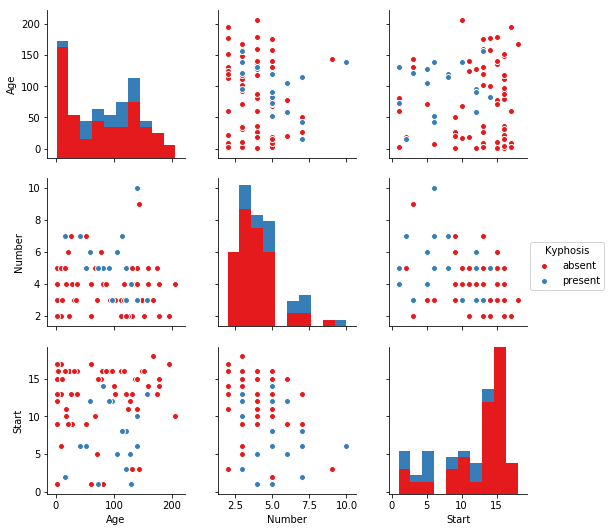

## Train Test Split

Let's split up the data into a training set and a test set!

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [10]:
print(x_train[:10])

    Age  Number  Start
42  143       9      3
62   81       4      1
10   82       5     14
56    2       3     13
14  168       3     18
78  120       2     13
2   128       4      5
32  130       5     13
23  131       2      3
61  114       7      8


In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
Age       81 non-null int64
Number    81 non-null int64
Start     81 non-null int64
dtypes: int64(3)
memory usage: 2.0 KB


In [13]:
x.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


## Decision Trees

We'll start just by training a single decision tree.

* Tree 에서는 굳이 스케일링을 해줄 필요가 없다. 크게 신경 안씀

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree = DecisionTreeClassifier()

In [17]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [18]:
prediction = dtree.predict(x_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
confusion_matrix(y_test, prediction)

array([[16,  3],
       [ 5,  1]], dtype=int64)

array([[19,  1],
       [ 3,  2]], dtype=int64)

In [24]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      absent       0.76      0.84      0.80        19
     present       0.25      0.17      0.20         6

   micro avg       0.68      0.68      0.68        25
   macro avg       0.51      0.50      0.50        25
weighted avg       0.64      0.68      0.66        25



             precision    recall  f1-score   support

     absent       0.86      0.95      0.90        20
    present       0.67      0.40      0.50         5

avg / total       0.82      0.84      0.82        25



In [26]:
dtree.feature_importances_

array([0.31292411, 0.15190616, 0.53516973])

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [28]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

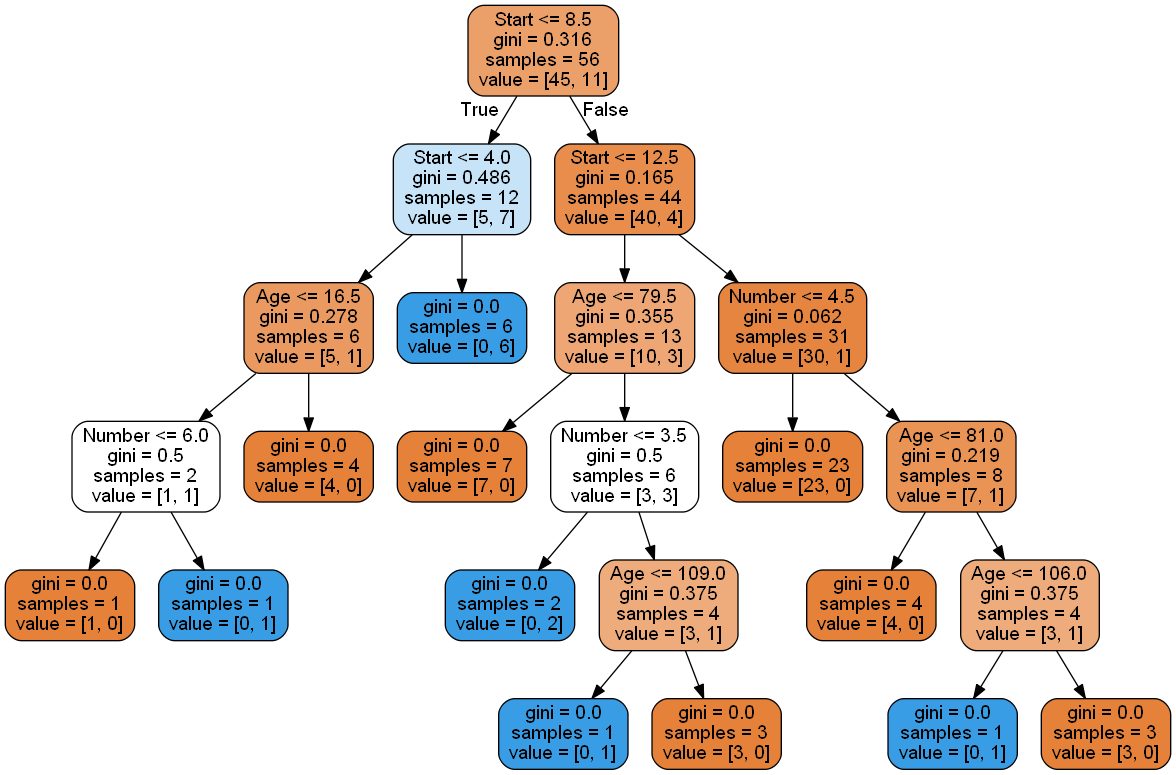

In [29]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

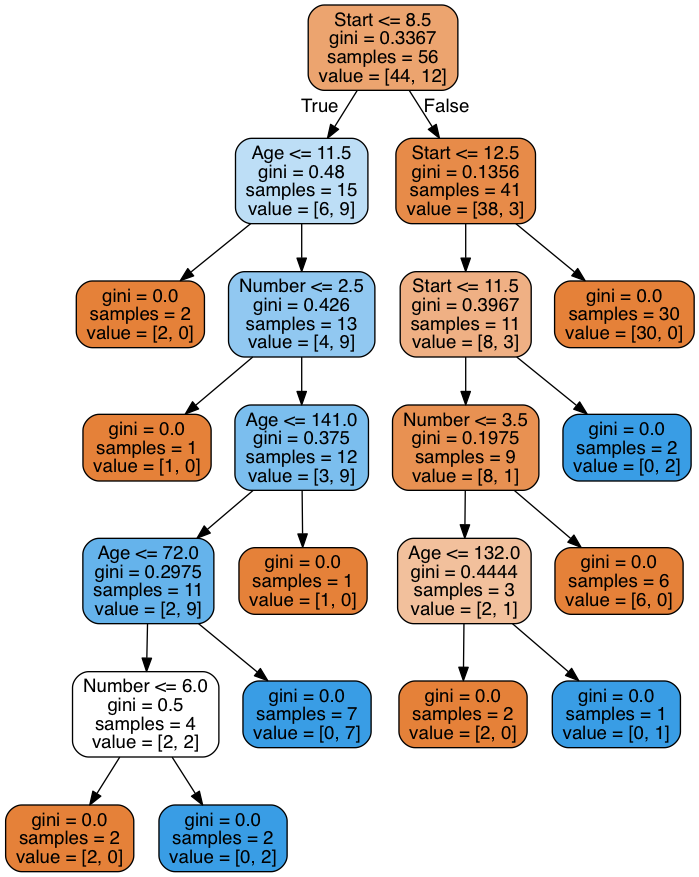

In [39]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100) # n_estimators = 100 나무를 100개 만든다
rfc.fit(x_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
rfc_pred = rfc.predict(x_test)

In [34]:
print(confusion_matrix(y_test, rfc_pred))

[[19  0]
 [ 5  1]]


array([[20,  0],
       [ 3,  2]], dtype=int64)

In [35]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

   micro avg       0.80      0.80      0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



             precision    recall  f1-score   support

     absent       0.87      1.00      0.93        20
    present       1.00      0.40      0.57         5

avg / total       0.90      0.88      0.86        25

